In [1]:
import socket
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
HOST = "127.0.0.1"

In [3]:
class Client:
    def __init__(self, server_port,  image, block_size=1024):
        self.server_port = server_port
        self.block_size = block_size
        self.img = image
        self.socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        
    def send_image(self):
        # Отправка размера изображения
        h, w, _ = img.shape
        n = h * w * 3
        h_bytes = h.to_bytes(length=4, byteorder='big')
        w_bytes = w.to_bytes(length=4, byteorder='big')
        img_bytes = img.tobytes()

        with self.socket as s:
            print(f"Ожидание соединения с портом {self.server_port}.")
            s.connect((HOST, self.server_port))
            print("Соединение с сервером.")
            assert s.sendall(h_bytes) is None, print("Ошибка отправки h_bytes: %s", e)
            assert s.sendall(w_bytes) is None, print("Ошибка отправки w_bytes: %s", e)

            # отправка изображения
            n_iters = n // self.block_size
            n_remainder = n - n_iters * self.block_size
            for i in range(n_iters):
                block = img_bytes[self.block_size*i:(i+1)*self.block_size]
                assert s.sendall(block) is None, print("Ошибка отправки изображения: %s", e)

            if n_remainder > 0:
                block = img_bytes[-n_remainder:]
                assert s.sendall(block) is None, print("Ошибка отправки изображения: %s", e)
            print("Изображение успешно отправлено.")

(1280, 2048, 3)


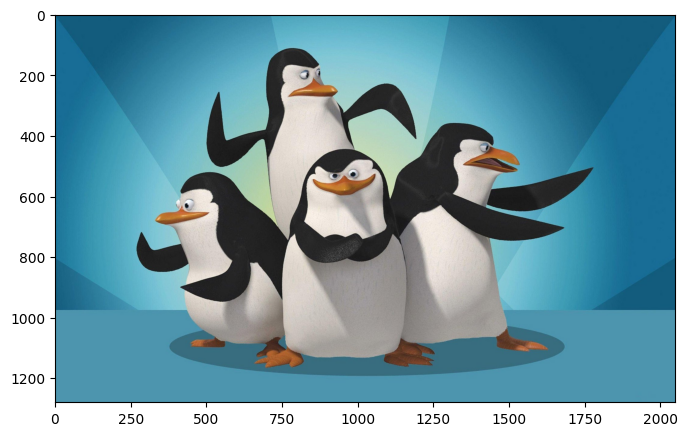

In [7]:
# Загрузка изображения и преобразование изображения в массив numpy
img = cv2.imread("./data/jpg.jpg")
# Просмотр изображения перед отправкой
print(img.shape)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
client = Client(server_port=5065,image=img)
client.send_image()

Ожидание соединения с портом 5065.
Connected to server.
Изображение успешно отправлено.
